# PyFolding SI Notebook 5
---

[Author] ERGM

---

## This is to fit Equilibrium Curves to Homopolymer (also called Homozipper) Ising Model ##

In this notebook we will show how equilbrium folding data can be imported into a notebook and fitted to Homopolymer Ising Model. 

If you are less script/computer orientated, you can simply change the data paths and other parameters for your proteins and re-run the jupyter notebook ( "Kernal/Restart & Run all" from the menu above).



## Data Format

Please see PyFolding SI Notebooks 1 and 2 for the format your data has to be in to enable this type of analysis.
Remember for Ising Model Analysis here each protein dataset (equilibrium denaturation curve) must have its own .csv

---

#### First off lets load pyfolding & pyplot into this ipython notebook (pyplot allows us to plot more complex figures of our results):

In [1]:
# use this command to tell Jupyter to plot figures inline with the text
%matplotlib inline

# import pyfolding, the pyfolding models and ising models
import pyfolding
from pyfolding import *

# import the package for plotting, call it plt
import matplotlib.pyplot as plt

# import numpy as well
import numpy as np

<IPython.core.display.Javascript object>

PyFolding: Jupyter autoscrolling has been disabled


---

#### Now, we need to load some data to analyse.

I will import the equilibrium denaturation of a series of CTPRa proteins from:

`Phillips, J. J., Javadi, Y., Millership, C. & Main, E. R. Modulation of the multistate folding of designed TPR proteins through intrinsic and extrinsic factors. Protein Sci 21, 327–338 (2012).`

I will load 7 denaturation curves that correspond to the following proteins:

Protein     |Filename     |No. of Helices (repeating unit)
:--------:  |:-------:    |:-------:
CTPRa2      | H2_25C.csv  |  5
CTPRa3      | H3_25C.csv  |  7
CTPRa4      | H4_25C.csv  |  9
CTPRa5      | H5_25C.csv  |  11
CTPRa6      | H6_25C.csv  |  13
CTPRa8      | H8_25C.csv  |  17
CTPRa10     | H10_25C.csv |  21


In [2]:
# we will load all of the data together, as follows:

# arguments are "path", "filename"
pth = "/Users/ergm/Dropbox/AlanLoweCollaboration/Datasets/EwanDatasets/Equilm/Ewan_HCTPR_Datasets/PhospH7_25C"

#this is a set of commands to automate loading the data for each proteins
fn = ["H2_25C.csv","H3_25C.csv","H4_25C.csv","H5_25C.csv","H6_25C.csv","H8_25C.csv","H10_25C.csv"]

#Here we are loading all the curves in a list called "proteins" and assigning them names
proteins = [pyfolding.read_equilibrium_data(pth,f) for f in fn] 

# also store the number of helices for each protein
n_helices = [5, 7, 9, 11, 13, 17, 21]

In [3]:
# Set temperature to 25.00°C
# (NOTE: Careful, this sets the temperature for all subsequent calculations)
pyfolding.set_temperature(25.)

Set temperature to 25.00°C
(NOTE: Careful, this sets the temperature for all subsequent calculations)


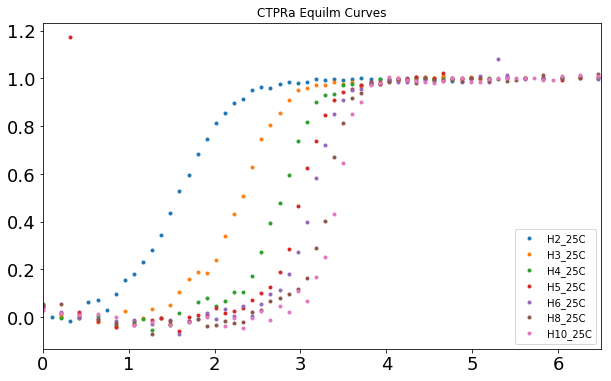

In [4]:
# the following commands plot all the data curves on one plot

plt.figure(figsize=(10,6))    
for c in proteins:          
    plt.plot(c.x, c.y, '.')

# the following commands plot all the data curves on one plot, where "loc" command determines where the legend goes.  
plt.legend([c.ID for c in proteins], loc='best')
plt.title("CTPRa Equilm Curves")
plt.xlim([0, 6.5])                                              # x axis from 0 to 6.5
plt.show()



In [5]:
# printing the equation for viewing

models.HomozipperIsingEquilibrium().print_equation()

<IPython.core.display.Math object>

### Fitting to a Homopolymer Ising model
We need to define a topology for each protein, this is essentially the domains of the protein in order (N->C)

#### Protein topology can be defined via the following Ising motifs

 Module              | Abbreviation | Defined in Ising as 
-----------------    | :----------: | --------------------
Module, type 1       | r            | RepeatDomain         
Module, type 2       | Mr           | MutantRepeatDomain   
Module, type 3       | h            | HelixDomain          
Module, type 4       | l            | LoopDomain           
Module, type 5       | Ml           | MutantLoopDomain       
Cap Module           | c            | CapDomain            
Mut. Cap Module      | Mc           | MutantCapDomain
Decoupled Cap Domain | DC           | DecoupleCapDomain

For Homopolymer fitting Helix, Repeat & loop motif functions are identical. 
We will need the differing types when using the Heteropolymer in the next Notebook. The nomenclature stems from our CTPR proteins analysis, as their repeated motifs can be defined in terms of either repeated TPRs, repeated helices and/or loops.

##### Each motif is defined as having:
1. an intrinisic stability term (Gi)
2. a denaturation dependence term (mi) - which is associated with Gi
3. an interface energy term (Gij) - defined as the interaction between folded units i and i-1, i.e. the interface of the i unit with the N-terminal unit i-1 to it.
4. The Ising model automatically takes into account the first N-terminal repeat does not have an interface term {ij} associated with it.

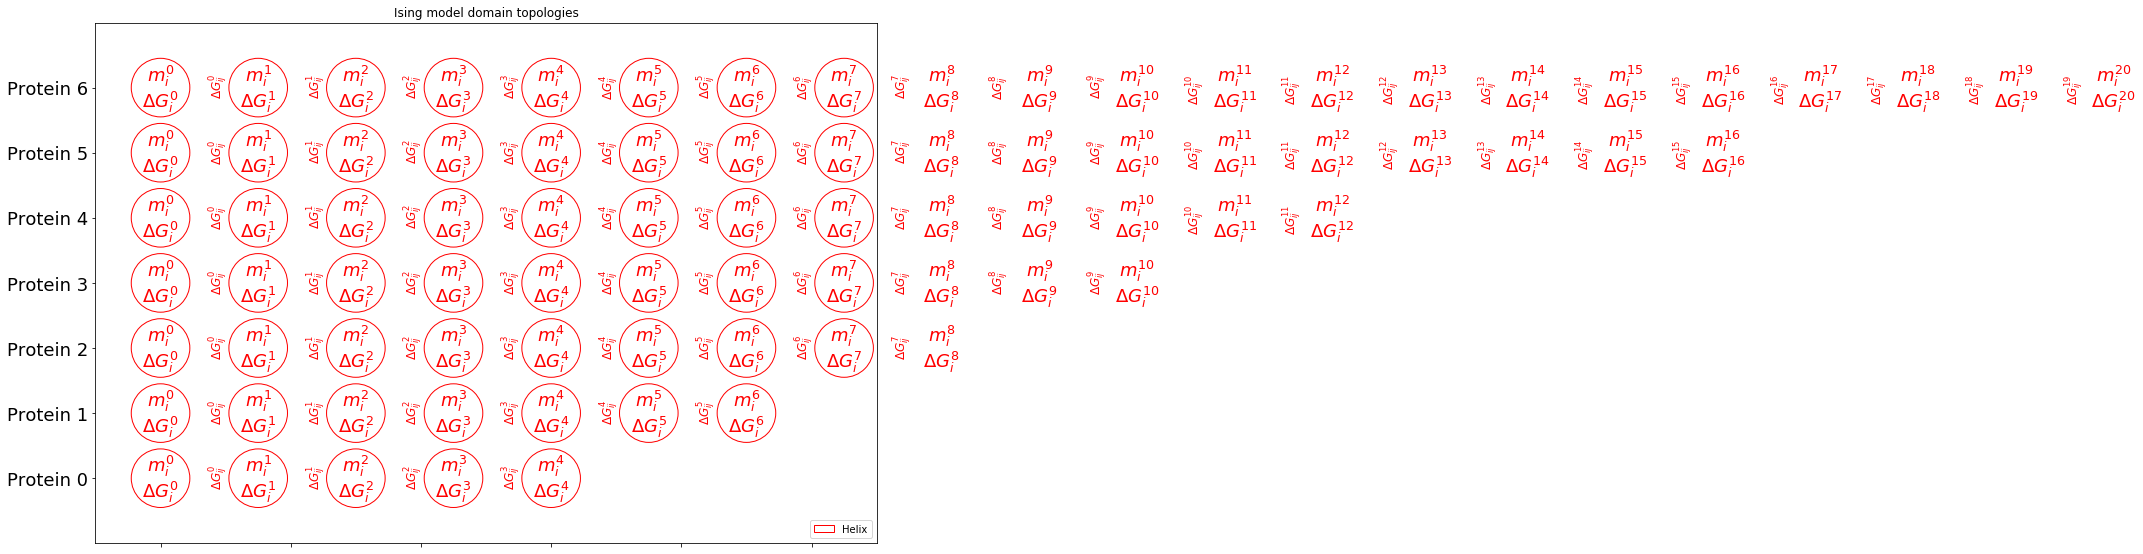

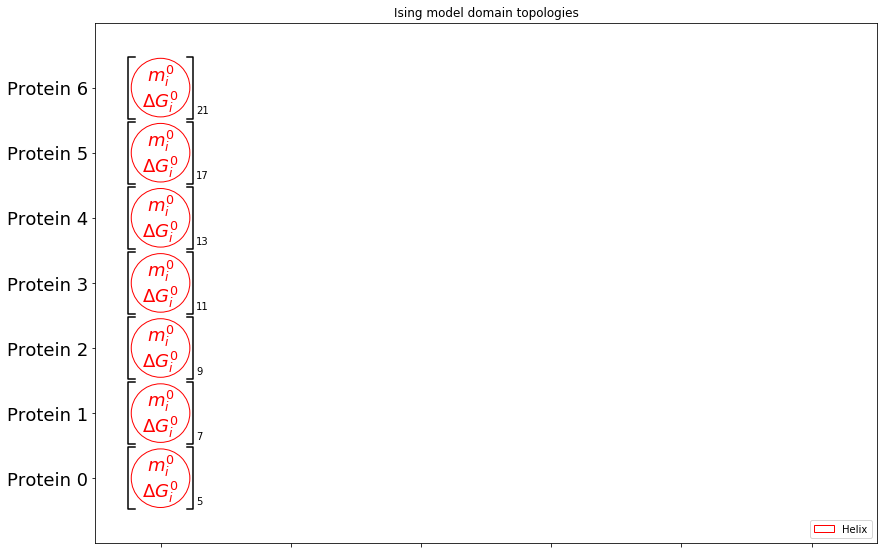

In [6]:
# set up the protein topologies automatically
h = ising.HelixDomain 

# We have already defined the number of helices for each protein in cell (3) as "n_helices", so:
topology = [[h]*n for n in n_helices]

# plot them either in an expanded form
ising.plot_domains(topology, collapse=False)

# or in a collapsed form
ising.plot_domains(topology, collapse=True)

### Automatic global fitting to the homozipper model

We will try to fit this with the homozipper model to get the parameters


Fitting results: 
DG_intrinsic: 3.52510 ± 0.00037 
m_intrinsic: -0.45188 ± 0.00004 
DG_interface: -5.29429 ± 0.00051 


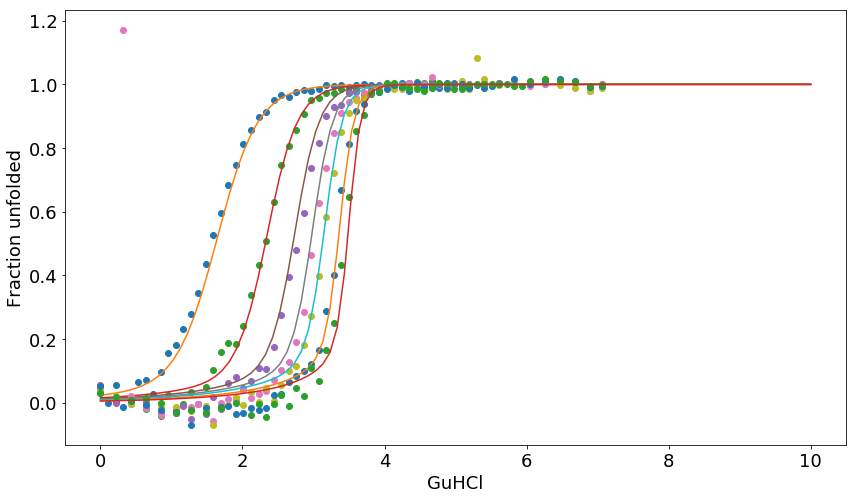

Written out .csv file of fits...


In [7]:
# try with a one-liner where we also save out the curve fits
r_homo = ising.fit_homopolymer(proteins, n_helices, save='/Users/ergm/Desktop/test.csv')

---

### End of this Notebook.

---